In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
df = pd.read_csv("csv_result-chronic_kidney_disease_full.csv")
df= df.rename(columns = lambda x:x.strip("'"))
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [5]:
df.replace('?', -1, inplace=True)
df.replace('normal', 1, inplace=True)
df.replace('abnormal', 0, inplace=True)
df.replace('present', 1, inplace=True)
df.replace('notpresent', 0, inplace=True)
df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)
df.replace('good', 1, inplace=True)
df.replace('poor', 0, inplace=True)
df.replace('ckd', 1, inplace=True)
df.replace('notckd', 0, inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,-1,1,0,0,...,44,7800,5.2,1,1,0,1,0,0,1
1,2,7,50,1.020,4,0,-1,1,0,0,...,38,6000,-1,0,0,0,1,0,0,1
2,3,62,80,1.010,2,3,1,1,0,0,...,31,7500,-1,0,1,0,0,0,1,1
3,4,48,70,1.005,4,0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
4,5,51,80,1.010,2,0,1,1,0,0,...,35,7300,4.6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.020,0,0,1,1,0,0,...,47,6700,4.9,0,0,0,1,0,0,0
396,397,42,70,1.025,0,0,1,1,0,0,...,54,7800,6.2,0,0,0,1,0,0,0
397,398,12,80,1.020,0,0,1,1,0,0,...,49,6600,5.4,0,0,0,1,0,0,0
398,399,17,60,1.025,0,0,1,1,0,0,...,51,7200,5.9,0,0,0,1,0,0,0


In [6]:
df = df.astype({
    'id': 'int64',
    'age': 'int64',
    'bp': 'int64',
    'sg': 'float64',
    'al': 'int64',
    'su': 'int64',
    'rbc': 'category',
    'pc': 'category',
    'pcc': 'category',
    'ba': 'category',
    'bgr': 'float64',
    'bu': 'float64',
    'sc': 'float64',
    'sod': 'float64',
    'pot': 'float64',
    'hemo': 'float64',
    'pcv': 'int64',
    'wbcc': 'int64',
    'rbcc': 'float64',
    'htn': 'category',
    'dm': 'category',
    'cad': 'category',
    'appet': 'category',
    'pe': 'category',
    'ane': 'category',
    'class': 'category',
 
})

In [7]:
df.replace( -1,np.nan, inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,2,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,3,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,4,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,5,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47.0,6700.0,4.9,0,0,0,1,0,0,0
396,397,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54.0,7800.0,6.2,0,0,0,1,0,0,0
397,398,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49.0,6600.0,5.4,0,0,0,1,0,0,0
398,399,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51.0,7200.0,5.9,0,0,0,1,0,0,0


In [8]:
# converting NaN to means and most common values

for column in df:
    if df[column].dtype== 'float64'or df[column].dtype== 'int64':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    if df[column].dtype =='category':
        most_common_value = df[column].mode()[0]
        df[column].fillna(most_common_value, inplace=True)
df
fd =df.copy()
fd.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [9]:
df= df.iloc[:,1:]
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,1,0,0,0


In [10]:
for column in df.columns:   
    if df[column].dtype == 'float64':
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        threshold = 3  # Adjust this threshold as needed
        outlier_indices = np.where(z_scores > threshold)[0]

fd = df.drop(outlier_indices)
fd

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,1,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,1,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,1,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,1,0,0,0


In [11]:
# fd = df.copy()
numeric_cols = fd.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
fd[numeric_cols] = scaler.fit_transform(fd[numeric_cols])
fd

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.200538,0.268507,0.475891,0.002452,-0.437374,1,1,0,0,-0.363679,...,0.625178,-0.248694,0.605830,1,1,0,1,0,0,1
1,-2.614234,-1.964101,0.475891,2.395332,-0.437374,1,1,0,0,-0.002494,...,-0.126095,-0.964574,-0.006015,0,0,0,1,0,0,1
2,0.623650,0.268507,-1.391312,0.800078,2.471823,1,1,0,0,3.670789,...,-1.002581,-0.368007,-0.006015,0,1,0,0,0,1,1
3,-0.200538,-0.475695,-2.324913,2.395332,-0.437374,1,0,1,0,-0.417116,...,-0.877369,-0.686176,-1.008978,1,0,0,0,1,1,1
4,-0.023926,0.268507,-1.391312,0.800078,-0.437374,1,1,0,0,-0.564067,...,-0.501732,-0.447549,-0.139466,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.211556,0.268507,0.475891,-0.795175,-0.437374,1,1,0,0,-0.109855,...,1.000815,-0.686176,0.233182,0,0,0,1,0,0,0
396,-0.553762,-0.475695,1.409492,-0.795175,-0.437374,1,1,0,0,-0.978201,...,1.877301,-0.248694,1.847990,0,0,0,1,0,0,0
397,-2.319881,0.268507,0.475891,-0.795175,-0.437374,1,1,0,0,-0.644222,...,1.251240,-0.725947,0.854262,0,0,0,1,0,0,0
398,-2.025527,-1.219898,1.409492,-0.795175,-0.437374,1,1,0,0,-0.457193,...,1.501664,-0.487321,1.475342,0,0,0,1,0,0,0


In [12]:

# Assume you have a DataFrame called 'df' with the values you want to scale

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns you want to scale (e.g., all columns in the DataFrame)
columns_to_scale = fd.columns


# Scale the selected columns to the range of 0-1
fd[numeric_cols] = scaler.fit_transform(fd[numeric_cols])
# fd = fd.iloc[:,:-1]
fd

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1,1,0,0,0.211538,...,0.750,0.231405,0.690476,1,1,0,1,0,0,1
1,0.056818,0.000000,0.75,0.8,0.0,1,1,0,0,0.269309,...,0.600,0.157025,0.573199,0,0,0,1,0,0,1
2,0.681818,0.230769,0.25,0.4,0.6,1,1,0,0,0.856838,...,0.425,0.219008,0.573199,0,1,0,0,0,1,1
3,0.522727,0.153846,0.00,0.8,0.0,1,0,1,0,0.202991,...,0.450,0.185950,0.380952,1,0,0,0,1,1,1
4,0.556818,0.230769,0.25,0.4,0.0,1,1,0,0,0.179487,...,0.525,0.210744,0.547619,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,1,1,0,0,0.252137,...,0.825,0.185950,0.619048,0,0,0,1,0,0,0
396,0.454545,0.153846,1.00,0.0,0.0,1,1,0,0,0.113248,...,1.000,0.231405,0.928571,0,0,0,1,0,0,0
397,0.113636,0.230769,0.75,0.0,0.0,1,1,0,0,0.166667,...,0.875,0.181818,0.738095,0,0,0,1,0,0,0
398,0.170455,0.076923,1.00,0.0,0.0,1,1,0,0,0.196581,...,0.925,0.206612,0.857143,0,0,0,1,0,0,0


In [47]:
features = np.array(df)
features_scaled = np.array(fd)
features_one_zero = np.array(fd)



In [48]:
k=2
kmeans = KMeans(n_clusters=k,init='random',algorithm='auto')
kmeans_scaled = KMeans(n_clusters=k,init='random',algorithm='auto')
kmeans_one_zero = KMeans(n_clusters=k,init='random',algorithm='auto')

kmeans.fit(features)
kmeans_scaled.fit(features_scaled)
kmeans_one_zero.fit(features_one_zero)


/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/pytho

KMeans(algorithm='auto', init='random', n_clusters=2)

In [49]:
fd

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.230769,0.75,0.2,0.0,1,1,0,0,0.211538,0.088575,...,0.750,0.231405,0.690476,1,1,0,1,0,0,1
1,0.000000,0.75,0.8,0.0,1,1,0,0,0.269309,0.042362,...,0.600,0.157025,0.573199,0,0,0,1,0,0,1
2,0.230769,0.25,0.4,0.6,1,1,0,0,0.856838,0.132221,...,0.425,0.219008,0.573199,0,1,0,0,0,1,1
3,0.153846,0.00,0.8,0.0,1,0,1,0,0.202991,0.139923,...,0.450,0.185950,0.380952,1,0,0,0,1,1,1
4,0.230769,0.25,0.4,0.0,1,1,0,0,0.179487,0.062901,...,0.525,0.210744,0.547619,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.230769,0.75,0.0,0.0,1,1,0,0,0.252137,0.121951,...,0.825,0.185950,0.619048,0,0,0,1,0,0,0
396,0.153846,1.00,0.0,0.0,1,1,0,0,0.113248,0.075738,...,1.000,0.231405,0.928571,0,0,0,1,0,0,0
397,0.230769,0.75,0.0,0.0,1,1,0,0,0.166667,0.062901,...,0.875,0.181818,0.738095,0,0,0,1,0,0,0
398,0.076923,1.00,0.0,0.0,1,1,0,0,0.196581,0.124519,...,0.925,0.206612,0.857143,0,0,0,1,0,0,0


In [50]:
cluster_labels = kmeans.labels_
cluster_labels_scaled = kmeans_scaled.labels_
cluster_zero_labels = kmeans_one_zero.labels_

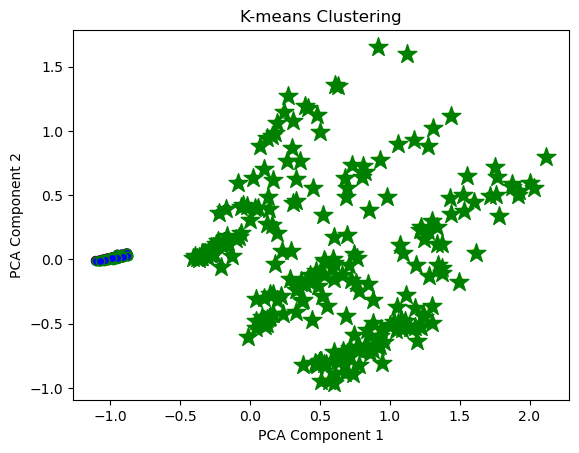

In [51]:

# Apply PCA to reduce the dimensionality of your data to 2 dimensions
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features_scaled)

# Visualize the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels_scaled, cmap='viridis')

for cluster_label in np.unique(cluster_labels_scaled):
    cluster_indices = (cluster_labels_scaled == cluster_label)
    cluster_color = colormap(normalized_labels[cluster_indices][0])
    plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1],
                c='blue', marker='o', edgecolors='green')

    target_class_indices = (fd['class'] == 1) & cluster_indices
    plt.scatter(reduced_features[target_class_indices, 0], reduced_features[target_class_indices, 1],
                c='green', marker='*', s=200)  # Increase the marker size (s) for better visibility

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.show()

In [52]:

# Silhouette Score
silhouette_avg = silhouette_score(features_scaled, cluster_labels_scaled)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(features_scaled, cluster_labels_scaled)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(features_scaled, cluster_labels_scaled)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.3453619038349097
Calinski-Harabasz Index: 184.07709959796463
Davies-Bouldin Index: 1.2443218984411288


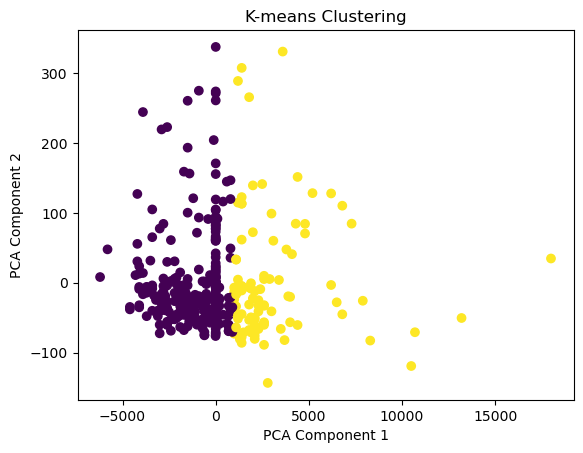

In [53]:

# Apply PCA to reduce the dimensionality of your data to 2 dimensions
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

# Visualize the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')


plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.show()

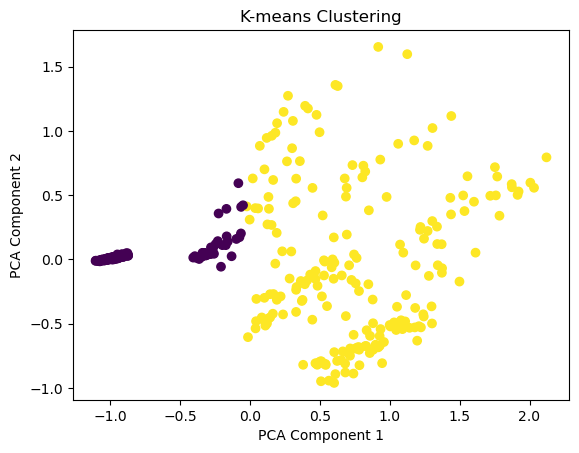

In [54]:

# Apply PCA to reduce the dimensionality of your data to 2 dimensions
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features_one_zero)

# Visualize the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels_scaled, cmap='viridis')


plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.savefig('scaledzeroone')
plt.show()

In [55]:

# Silhouette Score
silhouette_avg = silhouette_score(features_one_zero, cluster_zero_labels)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(features_one_zero, cluster_zero_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(features_one_zero, cluster_zero_labels)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.3453619038349097
Calinski-Harabasz Index: 184.07709959796463
Davies-Bouldin Index: 1.2443218984411288


/var/folders/_m/bxqt90pd1vvfzd4y2lzs02ym0000gn/T/ipykernel_2045/3758297424.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')
/var/folders/_m/bxqt90pd1vvfzd4y2lzs02ym0000gn/T/ipykernel_2045/3758297424.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1],
/var/folders/_m/bxqt90pd1vvfzd4y2lzs02ym0000gn/T/ipykernel_2045/3758297424.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, wh

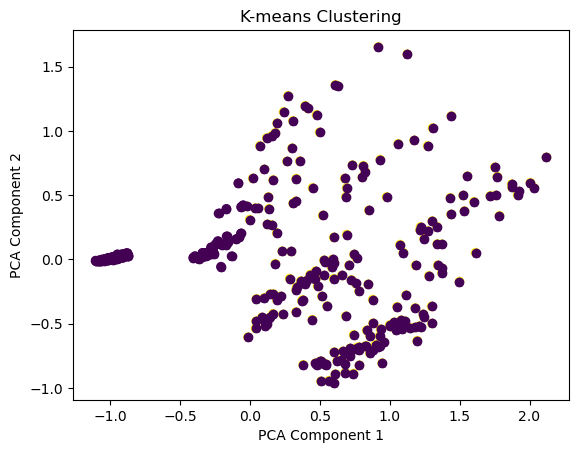

In [56]:
import matplotlib.pyplot as plt

# Assume you have cluster labels in 'cluster_labels_scaled' and target class in 'target_class'
# 'reduced_features' contains the reduced feature vectors obtained from PCA

# Define colors for the clusters and target class
cluster_colors = ['red', 'green', 'blue']
target_class_marker = 's'  # Square marker for target class points
colormap = plt.cm.get_cmap('viridis')

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels_scaled, cmap='viridis')

# Plot the dots representing target class 1 as stars in their cluster colors
for cluster_label in np.unique(cluster_labels_scaled):
    cluster_indices = (cluster_labels_scaled == cluster_label)
    cluster_color = colormap(cluster_label)
    plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1],
                c=cluster_color, marker='o')

    target_class_indices = (fd['class'] == 1) & cluster_indices
    plt.scatter(reduced_features[target_class_indices, 0], reduced_features[target_class_indices, 1],
                c=cluster_color, marker='*')

# Set labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.savefig('fig.png')
# Show the plot
plt.show()


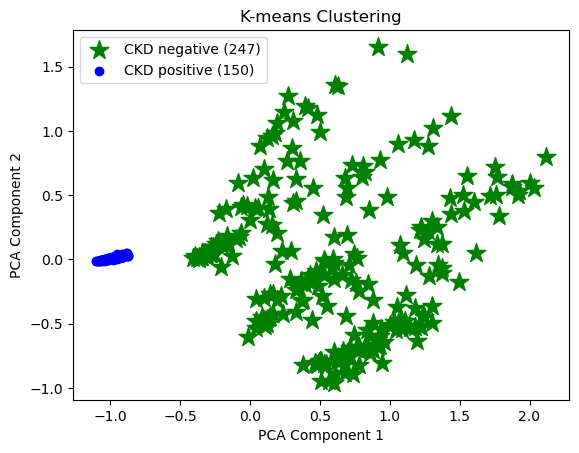

In [79]:
# Apply PCA to reduce the dimensionality of your data to 2 dimensions
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features_scaled)

# Initialize counters
negative_count = 0
positive_count = 0

# Visualize the clusters
for cluster_label in np.unique(cluster_labels_scaled):
    cluster_indices = (cluster_labels_scaled == cluster_label)

    if np.any(fd.loc[cluster_indices, 'class'] == 1):
        plt.scatter(reduced_features[cluster_indices & (fd['class'] == 1), 0], 
                    reduced_features[cluster_indices & (fd['class'] == 1), 1],
                    c='green', marker='*', s=200, label='Class 1')  # Star marker for class 1
        
        plt.scatter(reduced_features[cluster_indices & (fd['class'] != 1), 0], 
                    reduced_features[cluster_indices & (fd['class'] != 1), 1],
                    c='blue', marker='o', label='Other Classes')  # Dot marker for other classes

        negative_count += np.sum(cluster_indices & (fd['class'] == 1))
        positive_count += np.sum(cluster_indices & (fd['class'] != 1))
    else:
        plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1],
                    c='blue', marker='o', label='Other Classes')  # Dot marker for other classes

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')

# Display class counts as labels in the legend
legend_labels = [f'CKD negative ({negative_count})', f'C positive ({positive_count})']
plt.legend(labels=legend_labels)
plt.savefig('nice_clusters')
plt.show()


In [83]:

# Silhouette Score
silhouette_avg = silhouette_score(features_scaled, cluster_labels_scaled)
print("Silhouette Score:", silhouette_avg)

len(reduced_features)

Silhouette Score: 0.3453619038349097


397

/var/folders/_m/bxqt90pd1vvfzd4y2lzs02ym0000gn/T/ipykernel_2045/1302600114.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')
/var/folders/_m/bxqt90pd1vvfzd4y2lzs02ym0000gn/T/ipykernel_2045/1302600114.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1],


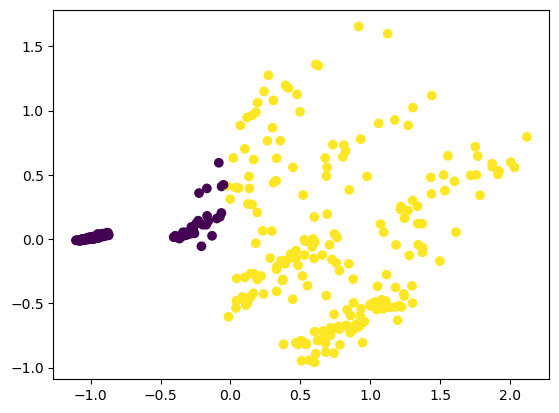

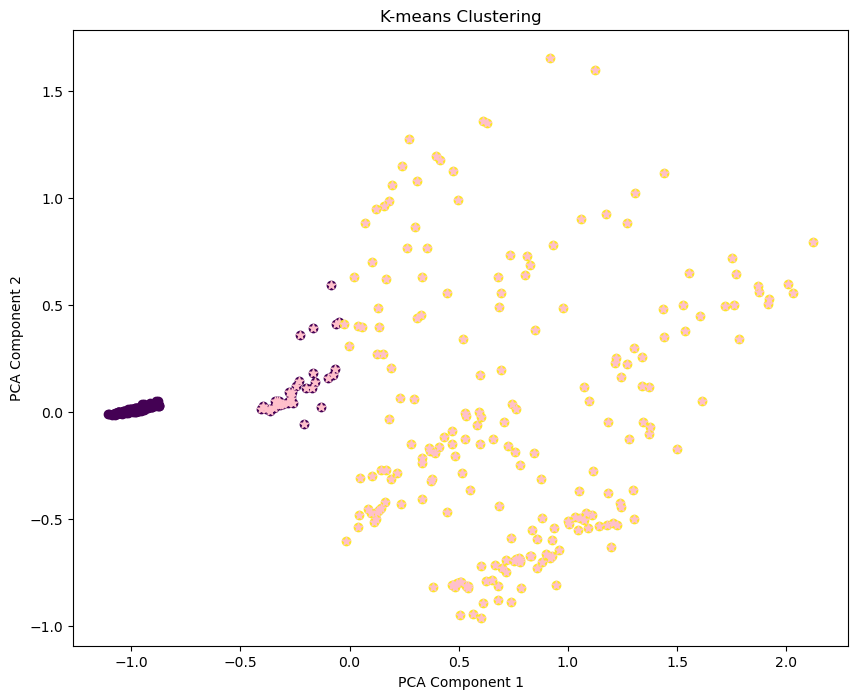

In [57]:
normalized_labels = (cluster_labels_scaled - np.min(cluster_labels_scaled)) / (np.max(cluster_labels_scaled) - np.min(cluster_labels_scaled))

# Define a colormap for the clusters
colormap = plt.cm.get_cmap('viridis')
reduced_features = pca.fit_transform(features_one_zero)

# Plot the clusters using the colormap
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=normalized_labels, cmap=colormap)
plt.figure(figsize=(10, 8)) 
for cluster_label in np.unique(cluster_labels_scaled):
    cluster_indices = (cluster_labels_scaled == cluster_label)
    cluster_color = colormap(normalized_labels[cluster_indices][0])
    plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1],
                c=cluster_color, marker='o')

    target_class_indices = (fd['class'] == 1) & cluster_indices
    plt.scatter(reduced_features[target_class_indices, 0], reduced_features[target_class_indices, 1],
                c='pink', marker='*')  # Increase the marker size (s) for better visibility

# Set labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')

# Save the plot
plt.savefig('figure_first.png')

# Show the plot
plt.show()

/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


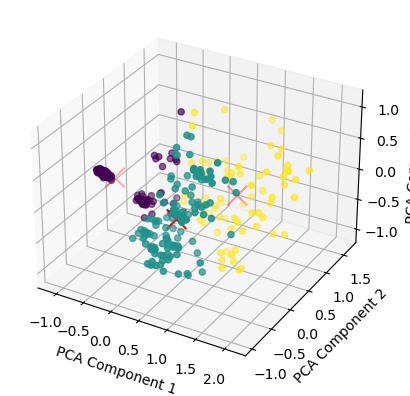

In [17]:

# Apply PCA to reduce dimensionality
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(fd)

# Perform K-means clustering on the reduced features
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(reduced_features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the 3D data and cluster centroids
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=labels, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, c='red')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.savefig('3d.png')
plt.show()


In [13]:
normalized_labels = (cluster_labels_scaled - np.min(cluster_labels_scaled)) / (np.max(cluster_labels_scaled) - np.min(cluster_labels_scaled))

# Define a colormap for the clusters
colormap = plt.cm.get_cmap('viridis')
reduced_features = pca.fit_transform(features_scaled)

# Plot the clusters using the colormap
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=normalized_labels, cmap=colormap)
plt.figure(figsize=(10, 8)) 
for cluster_label in np.unique(cluster_labels_scaled):
    cluster_indices = (cluster_labels_scaled == cluster_label)
    cluster_color = colormap(normalized_labels[cluster_indices][0])
    plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1],
                c=cluster_color, marker='o', edgecolors='cluster_color')

    target_class_indices = (dfs['class'] == 1) & cluster_indices
    plt.scatter(reduced_features[target_class_indices, 0], reduced_features[target_class_indices, 1],
                c=cluster_color, marker='*', s=200)  # Increase the marker size (s) for better visibility

# Set labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')

# Save the plot
plt.savefig('figure.png')

# Show the plot
plt.show()

NameError: name 'cluster_labels_scaled' is not defined

In [ ]:
unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)

# Print the size of each cluster
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} data points")

# Silhouette Score
silhouette_avg = silhouette_score(features_scaled, cluster_labels_scaled)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(features_scaled, cluster_labels_scaled)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(features_scaled, cluster_labels_scaled)
print("Davies-Bouldin Index:", davies_bouldin)

### explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained variance ratio for Component {i+1}: {ratio}")

In [251]:
cluster_centers = kmeans.cluster_centers_
cluster_avg_values = cluster_centers.mean(axis=0)
cluster_range_values = cluster_centers.max(axis=0) - cluster_centers.min(axis=0)
feature_concentration = cluster_range_values / cluster_avg_values
sorted_features = np.argsort(feature_concentration)[::-1]
print(cluster_avg_values)
print(cluster_range_values)
print(feature_concentration)

[7.68706583e+01 1.01705991e+00 1.08373664e+00 5.21563562e-01
 8.75509123e-01 7.90953343e-01 1.29242690e-01 6.62935859e-02
 1.51969363e+02 5.78998580e+01 2.99066015e+00 1.37687838e+02
 4.53203342e+00 1.24678728e+01 3.84848404e+01 9.39838980e+03
 4.64683964e+00 3.86784331e-01 3.66783668e-01 9.61952383e-02
 7.74363390e-01 1.99211894e-01 1.59343025e-01 6.37703235e-01]
[1.62257028e+00 1.40615879e-03 2.69848424e-01 2.88570148e-01
 2.82459684e-02 7.69561906e-02 9.79502633e-02 4.56306500e-02
 1.58902873e+01 1.91570196e+00 3.30481436e-01 6.42765079e-01
 3.84687555e-01 2.36621978e-01 1.61478001e+00 4.00916100e+03
 2.44829496e-01 7.79164873e-02 9.81158317e-02 4.52332859e-02
 8.33802444e-02 3.72197755e-02 3.77495944e-02 5.13262029e-02]
[0.0211078  0.00138257 0.24899816 0.55327897 0.03226233 0.09729549
 0.75787855 0.68831169 0.10456244 0.03308647 0.11050451 0.00466828
 0.08488189 0.01897854 0.04195886 0.42657956 0.05268731 0.20144686
 0.26750327 0.47022375 0.10767586 0.18683511 0.23690773 0.0804860

In [148]:
print(sorted_features)

[ 8 20  7 22  3 16 23  4 19 24  6 18 10 21 11 15 14 17  9 13  0  1  5 12
  2]


/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

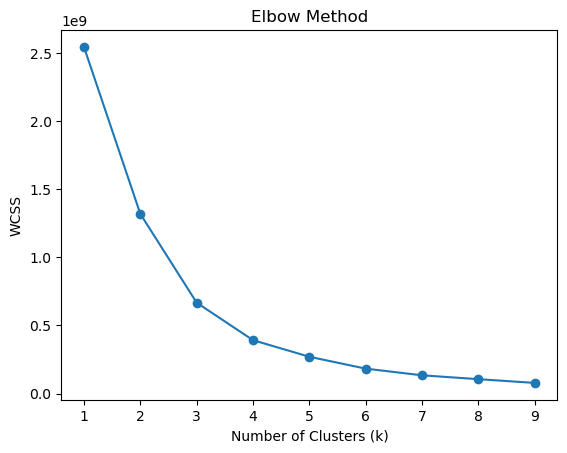

In [205]:
k_values = range(1, 10)

# Compute the within-cluster sum of squares (WCSS) for each k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

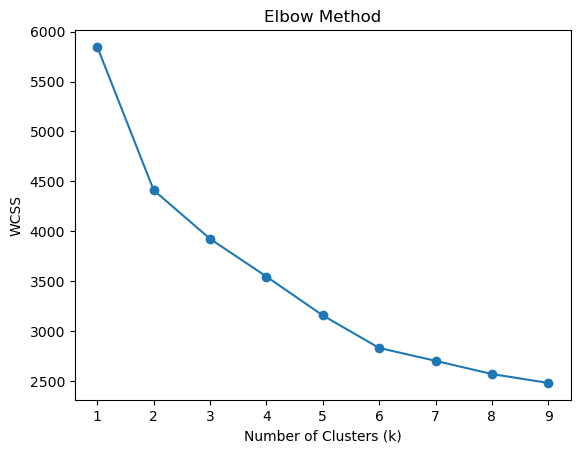

In [206]:
k_values = range(1, 10)

# Compute the within-cluster sum of squares (WCSS) for each k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.savefig('elbowmethod.png')
plt.show()

/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/itamaryuran/.conda/envs/maman22/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

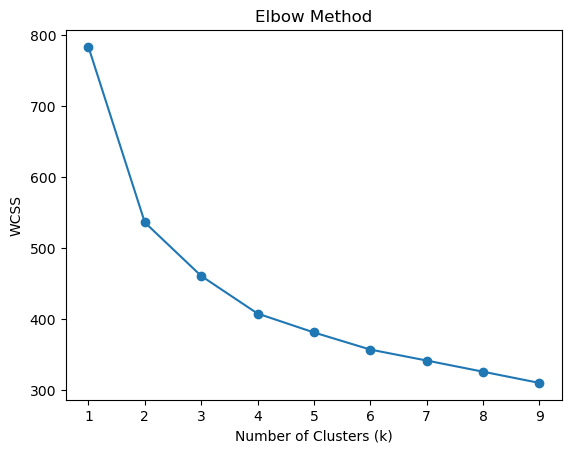

In [204]:
k_values = range(1, 10)

# Compute the within-cluster sum of squares (WCSS) for each k
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_one_zero)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.show()

In [242]:

# Silhouette Score
silhouette_avg = silhouette_score(features, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(features, cluster_labels)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(features, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.5479992641493971
Calinski-Harabasz Index: 363.1095301117617
Davies-Bouldin Index: 0.7382268922401936
